In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ładowanie danych
file_path = 'c:\\projekty\\cobot_with_weight\\concatenated_202210.csv_changing_columns.csv'
data = pd.read_csv(file_path)




In [57]:
print(len(data.columns))

79


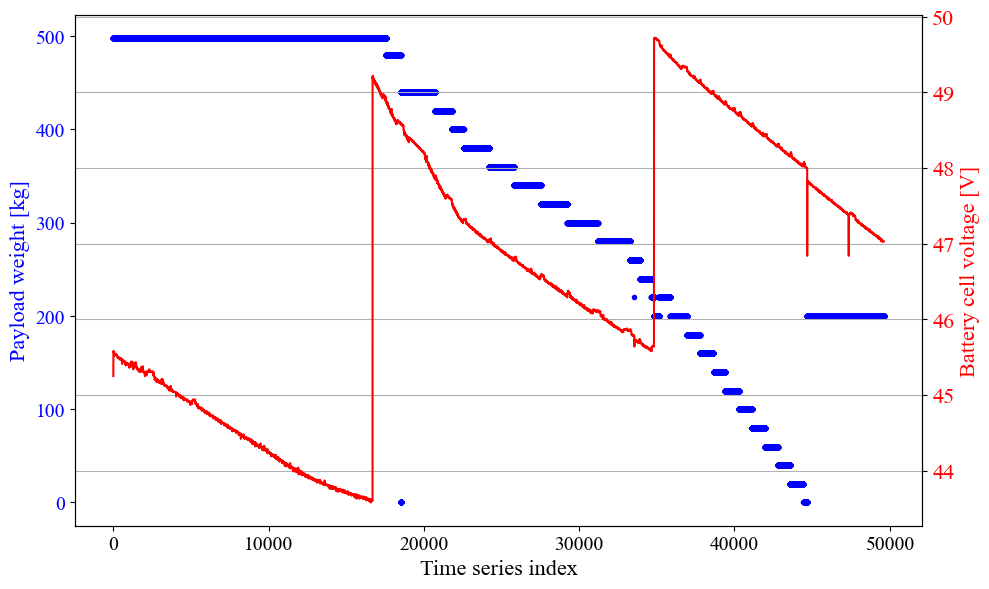

In [55]:
from matplotlib import rcParams

# Ustawienie globalne dla wszystkich tekstów na wykresie
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman'] # Nazwa może wymagać dostosowania


# Zakładając, że kolumna z indeksem czasowym nazywa się 'time_index'
# Jeśli masz inną nazwę, proszę ją odpowiednio zmienić
time_index = data.index  # lub data['nazwa_kolumny_z_indeksem_czasowym'], jeśli istnieje
# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(time_index, data['payload_weight'], marker='.', linestyle='None', color='blue', label='Payload weight')
plt.xlabel('Time series index', fontsize=16)
plt.ylabel('Payload weight [kg]', fontsize=16, color='blue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, color='blue')

# Tworzenie dodatkowej osi Y po prawej stronie dla napięcia baterii
ax2 = plt.gca().twinx()
ax2.plot(time_index, data['FH.6000.[ENS] - Energy Signals.Battery cell voltage'] / 1000, color='red', label='Battery cell voltage')
ax2.tick_params(axis='y', labelcolor='red', labelsize=16)
ax2.set_ylabel('Battery cell voltage [V]', fontsize=16, color='red')

# Ustawienia osi
plt.grid(True)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

In [4]:
# Wykres2 

import pandas as pd
import matplotlib.pyplot as plt

# Ścieżka do pliku CSV
base_dir = 'c:\\projekty\\cobot_july_august2\\'
sciezka_csv = base_dir + 'concatenated_with_wheel_diameter_changing_columns.csv'

# Wczytaj plik CSV
df = pd.read_csv(sciezka_csv)


In [32]:
print(df)

                               timestamp              isoTimestamp  \
0       2023-07-28 09:01:34.904000+00:00  2023-07-28T09:01:34.904Z   
1       2023-07-28 09:01:34.904000+00:00  2023-07-28T09:01:34.904Z   
2       2023-07-28 09:01:34.904000+00:00  2023-07-28T09:01:34.904Z   
3       2023-07-28 09:01:34.904000+00:00  2023-07-28T09:01:34.904Z   
4       2023-07-28 09:01:34.904000+00:00  2023-07-28T09:01:34.904Z   
...                                  ...                       ...   
121605  2023-08-02 13:23:57.885000+00:00  2023-08-02T13:23:57.885Z   
121606  2023-08-02 13:23:57.885000+00:00  2023-08-02T13:23:57.885Z   
121607  2023-08-02 13:23:58.906000+00:00  2023-08-02T13:23:58.906Z   
121608  2023-08-02 13:23:58.906000+00:00  2023-08-02T13:23:58.906Z   
121609  2023-08-02 13:23:59.903000+00:00  2023-08-02T13:23:59.903Z   

        FH.6000.[CRENS] - Collaborative Robot Energy Signals.CR Momentary power consumption W  \
0                                                       0     

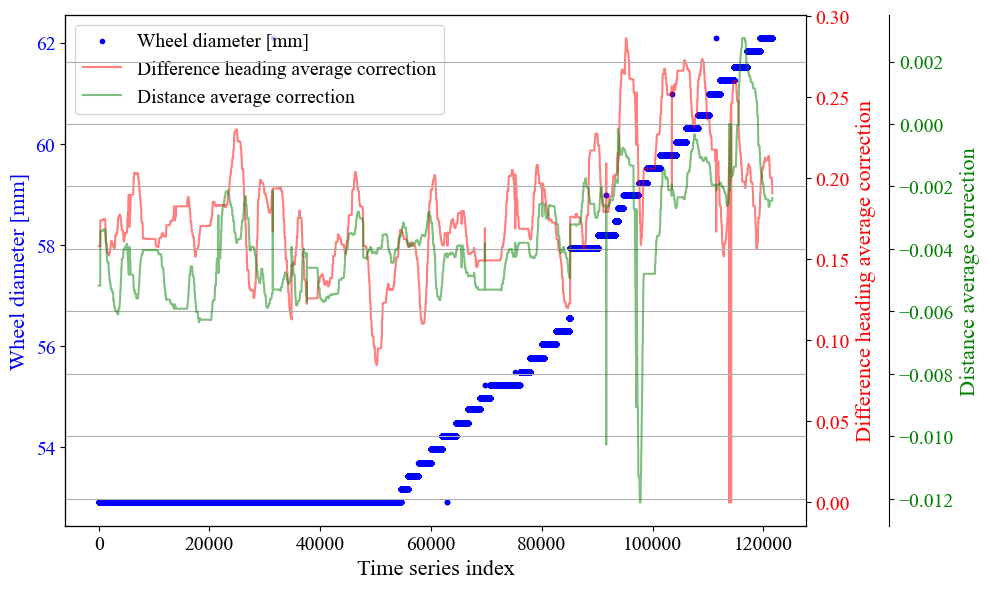

In [64]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Wybierz kolumny do narysowania
kolumna1 = 'WHEEL_DIAMETER'
kolumna2 = 'FH.6000.[NNS] - Natural Navigation Signals.Difference heading average correction'
kolumna3 = 'FH.6000.[NNS] - Natural Navigation Signals.Distance average correction'


fig, ax = plt.subplots(figsize=(10, 6))

# WHEEL_DIAMETER jako niebieskie kropki na głównej osi Y
ax.scatter(df.index, df[kolumna1], color='blue', label='Wheel diameter [mm]', marker='.')


smoothed_kolumna2 = df[kolumna2].rolling(window=3000).mean()
smoothed_kolumna3 = df[kolumna3].rolling(window=3000).mean()

# Pierwsza dodatkowa oś Y po prawej dla kolumna2
ax2 = ax.twinx()
ax2.plot(df.index, df[kolumna2], color='red', label='Difference heading average correction', alpha=0.5) # Oryginalna seria
# ax2.plot(df.index, smoothed_kolumna2, color='red', label='Smoothed difference heading correction', linestyle='--') # Wygładzona seria
ax2.set_ylabel('Difference heading average correction', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='red', labelsize=14)

# Tworzenie drugiej dodatkowej osi Y po prawej dla kolumna3
ax3 = ax.twinx()
# Przesunięcie drugiej osi Y bardziej w prawo
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(df.index, df[kolumna3], color='green', label='Distance average correction', alpha=0.5) # Oryginalna seria
# ax3.plot(df.index, smoothed_kolumna3, color='green', label='Smoothed distance average correction', linestyle='--') # Wygładzona seria
ax3.set_ylabel('Distance average correction', color='green', fontsize=16)
ax3.tick_params(axis='y', labelcolor='green', labelsize=14)

# Ustawienia osi X i Y
ax.set_xlabel('Time series index', fontsize=16)
ax.set_ylabel('Wheel diameter [mm]', color='blue', fontsize=16)
ax.tick_params(axis='y', labelcolor='blue', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

# Dodanie legendy
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left', fontsize=14)

plt.grid(True)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()


In [34]:
count_wheels = df['WHEEL_DIAMETER'].value_counts().reset_index()
count_wheels.columns = ['WHEEL_DIAMETER', 'count']

count_wheels

,WHEEL_DIAMETER,count
0,52.90,54494
1,55.23,5340
2,57.93,5031
3,58.19,3019
4,59.77,2858
5,58.99,2714
6,54.22,2516
7,61.26,2485
8,59.51,2449
9,61.51,2431


In [59]:
# Nazwa cechy referencyjnej
reference_feature = 'WHEEL_DIAMETER'

# Obliczanie współczynników korelacji Spearmana
spearman_corr = df.corr(method='spearman')

# Pobieranie korelacji dla cechy referencyjnej i sortowanie ich według wartości bezwzględnej
sorted_corr = spearman_corr[reference_feature].abs().sort_values(ascending=False)

# Wybieranie 10 najbardziej skorelowanych cech, pomijając pierwszą wartość, która jest korelacją cechy z samą sobą
top_10_features = sorted_corr[1:12]

# Wyświetlanie wyników
print("10 najbardziej skorelowanych cech z cechą '{}':".format(reference_feature))
print(top_10_features)

C:\Users\pbenecki\AppData\Local\Temp\ipykernel_6740\2695732953.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df.corr(method='spearman')


10 najbardziej skorelowanych cech z cechą 'WHEEL_DIAMETER':
FH.6000.[NNS] - Natural Navigation Signals.Distance average correction              0.647506
FH.6000.[IS] - Inclination Signals.Y inclination                                    0.636036
FH.6000.[NNS] - Natural Navigation Signals.Difference heading average correction    0.526844
FH.6000.[ENS] - Energy Signals.Battery cell voltage                                 0.410336
FH.6000.[ENS] - Energy Signals.State Of Charge                                      0.388731
FH.6000.[ENS] - Energy Signals.Momentary current consuption mA                      0.333573
FH.6000.[ENS] - Energy Signals.Momentary energy consumption Ws                      0.255149
FH.6000.[ENS] - Energy Signals.Momentary power consumption W                        0.248101
FH.6000.[ODS] - Odometry Signals.Cumulative distance right                          0.225289
FH.6000.[ENS] - Energy Signals.Cumulative energy consumption Wh                     0.167439
FH.6000.[I